# Analysis SPEC data in Python

## Wenjie Chen
### Date: May 17th, 2018

## Introduction

SPEC is a software that widely used in X-ray scattering experiments all around the world. However, it's hard to find a program or a tool to read the data which is produced from SPEC.

According to my research on the internet, a python module called __[pyspec](https://pythonhosted.org/pyspec/spec.html)__ was created by Stuart Wilkins about 10 years ago. Unfortunately I wasn't able to install it on my computer. I guess the problem is caused by the python version.

Nevertheless, I created this project to fulfill this goal --- to read and analysis SPEC data in Python.

## Functions

Several functions are defined to read and analysis SPEC data.

``` python
    spec_scan_reader(FILEPATH, FILENAME, scan_num) # Read SPEC data from a single data file with specific scan #.
    spec_data_reader(FILEPATH, FILENAME, scan_nums) # Read SPEC data from mutiple data files with specific scan #s.
    spec_plot(datablock, DETECTOR, data_legends, LEGEND_PREFIX, LEGEND_SUFFIX) # Plot a set of processed SPEC data together with legends.
    spec_data_average(FILEPATH, FILENAME, scan_nums) # Read several SPEC scans' data and average them.
    spec_data_bg_subtracted_scans(FILEPATH, FILENAME, signal_scan_nums, bg_scan_nums) # Subtract background from signals using SPEC data scan #s. 
    spec_data_bg_subtracted(signal_data, bg_data) # Subtract background from signals using readed/calculated SPEC data.
```

Notes: datablock is such a data format

``` python
    datablock = [data, data, data, ...]
```

## Source Code below:

In [212]:
def spec_scan_reader(FILEPATH, FILENAME, scan_num):
    
    '''
        Read SPEC data from a single data file with specific scan #. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_num : [int] to specific the scan number.
            
        returns:
            [th, TEY, MCP, pm3] : [list]
            
        example:
            [th, TEY, MCP, pm3] = spec_scan_reader("./data/", "Sample_A", 56)
    ''' 
    
    import numpy as np
    
    PATH = FILEPATH + FILENAME + "_" + str(scan_num).zfill(3) + ".dat"
    data_origin = np.loadtxt(PATH)
    data = np.transpose(data_origin)
    th = data[0]
    TEY = data[7]
    MCP = data[8]
    pm3 = data[12]
    
    return [th, TEY, MCP, pm3]

In [241]:
def spec_Escan_reader(FILEPATH, FILENAME, scan_num):
    
    '''
        Read SPEC Escan data from a single data file with specific scan #. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_num : [int] to specific the scan number.
            
        returns:
            [th, TEY, MCP, pm3] : [list]
            
        example:
            [th, TEY, MCP, pm3] = spec_scan_reader("./data/", "Sample_A", 56)
    ''' 
    
    import numpy as np
    
    PATH = FILEPATH + FILENAME + "_" + str(scan_num).zfill(3) + ".dat"
    data_origin = np.loadtxt(PATH)
    data = np.transpose(data_origin)
    E = data[0]
    TEY = data[6]
    MCP = data[7]
    pm3 = data[11]
    
    return [E, TEY, MCP, pm3]

In [159]:
def spec_data_reader(FILEPATH, FILENAME, scan_nums):
    
    '''
        Read SPEC data from mutiple data files with specific scan #s. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_nums : [list] to specific the scan numbers.
            
        returns:
            [th, TEY, MCP, pm3] : [list]
            
        example:
            datablock = spec_data_reader("./data/", "Sample_A", [100, 101, 102])
    ''' 
    
    import numpy as np
    
    data = []
    
    for scan_num in scan_nums:
        data.append(spec_scan_reader(FILEPATH, FILENAME, scan_num))
    
    return data

In [239]:
def spec_plot(datablock, VARIABLE, DETECTOR, data_legends, LEGEND_PREFIX, LEGEND_SUFFIX):
    
    '''
        Plot a set of processed SPEC data together with legends. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            datablock : [list] data read from SPEC data file with function "spec_data_reader".
            DETECTOR : [string] must be chosen from "TEY", "MCP", "pm3".
            data_legends : [list] a set of legends, [20, 40, 60], e.g.
            LEGEND_PREFIX : [string] prefix to data_legends.
            LEGEND_SUFFIX : [string] suffix to data_legends.
            
        returns:
            a figure with multiple curves marked with legends
            
        example:
            spec_plot(datablock, "MCP", [100, 101, 102], "scan #", "")
            spec_plot(datablock, "MCP", [20, 50, 80], "T = ", " K")
    ''' 
    import matplotlib.pyplot as plt
    
    if DETECTOR == "TEY":
        det = 1
    elif DETECTOR == "MCP":
        det = 2
    elif DETECTOR == "pm3":
        det = 3
    else:
        raise ValueError('DETECTOR must be "TEY", "MCP" or "pm3"!')

    i = 0
    for legend in data_legends:
        plt.plot(datablock[i][0], datablock[i][det], label = LEGEND_PREFIX + str(legend) + LEGEND_SUFFIX)
        i = i + 1
    plt.xlabel(VARIABLE)
    plt.ylabel(DETECTOR)
    plt.legend()
    plt.show()
    return

In [161]:
def spec_data_average(FILEPATH, FILENAME, scan_nums):
    
    '''
        Read several SPEC scans' data and average them. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_nums : [list] to specific the scan numbers.
            
        returns:
            [th, TEY, MCP, pm3] : [list]
            
        example:
            [th, TEY, MCP, pm3] = spec_data_average("./data/", "Sample_A", [100, 101, 102])
    ''' 
    
    import numpy as np
    
    data = []
    
    for scan_num in scan_nums:
        data.append(spec_scan_reader(FILEPATH, FILENAME, scan_num))
    
    th = data[0][0]
    TEY = data[0][1]
    MCP = data[0][2]
    pm3 = data[0][3]
    
    i = 1
    scan_nums_minus = scan_nums[:-1]
    for scan_num in scan_nums_minus:
        TEY = TEY + data[i][1]
        MCP = MCP + data[i][2]
        pm3 = pm3 + data[i][3]
        i = i + 1
        
    TEY = TEY / i
    MCP = MCP / i
    pm3 = pm3 / i
    
    return [th, TEY, MCP, pm3]

In [162]:
def spec_data_bg_subtracted_scans(FILEPATH, FILENAME, signal_scan_nums, bg_scan_nums):
    
    '''
        Subtract background from signals using SPEC data scan #s. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            signal_scan_nums : [list] to specific the scan numbers of signals.
            bg_scan_nums : [list] to specific the scan numbers of the background.
            
        returns:
            [th, TEY, MCP, pm3] : [list]
            
        example:
            [th, TEY, MCP, pm3] = spec_data_bg_subtracted_scans("./data/", "Sample_A", [100, 101, 102], [200, 201, 202])
    ''' 
    
    [th_sig, TEY_sig, MCP_sig, pm3_sig] = spec_data_average(FILEPATH, FILENAME, signal_scan_nums)
    [th_bg, TEY_bg, MCP_bg, pm3_bg] = spec_data_average(FILEPATH, FILENAME, bg_scan_nums)
    TEY = TEY_sig - TEY_bg
    MCP = MCP_sig - MCP_bg
    pm3 = pm3_sig - pm3_bg
    
    return [th_sig, TEY, MCP, pm3]

In [163]:
def spec_data_bg_subtracted(signal_data, bg_data):
    
    '''
        Subtract background from signals using readed/calculated SPEC data. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            signal_data : [list] = [th, TEY, MCP, pm3]
            bg_data : [list] = [th, TEY, MCP, pm3]
            
        returns:
            [th, TEY, MCP, pm3] : [list]
            
        example:
            [th, TEY, MCP, pm3] = spec_data_bg_subtracted(signal_data, bg_data)
    ''' 
    
    TEY = signal_data[1] - bg_data[1]
    MCP = signal_data[2] - bg_data[2]
    pm3 = signal_data[3] - bg_data[3]
    
    return [signal_data[0], TEY, MCP, pm3]

Below is the test zone.

In [164]:
[th, TEY, MCP, pm3] = spec_scan_reader("./data/", "E6_Bare", 151)

In [165]:
import matplotlib.pyplot as plt

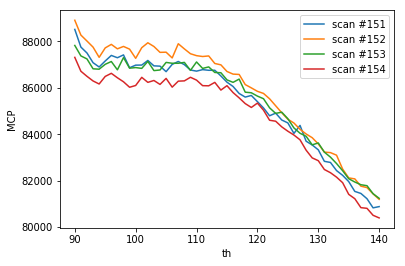

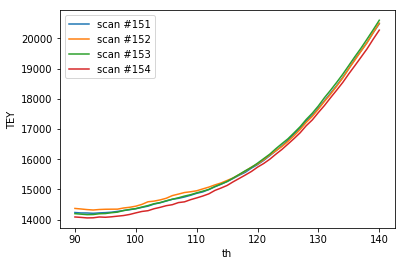

In [166]:
scan_nums = [151, 152, 153, 154]
datablock = spec_data_reader("./data/", "E6_Bare", scan_nums)
spec_plot(datablock, "MCP", scan_nums, "scan #", "")
spec_plot(datablock, "TEY", scan_nums, "scan #", "")

In [167]:
a = "test"
b = "test"
a == b

True

In [170]:
a = [1, 2, 3]
b = [4, 5, 6]
c= [np.array(a), np.array(b)]

In [172]:
sum(c)

array([5, 7, 9])

In [173]:
[th, TEY, MCP, pm3] = spec_data_average("./data/", "E6_Bare", scan_nums)

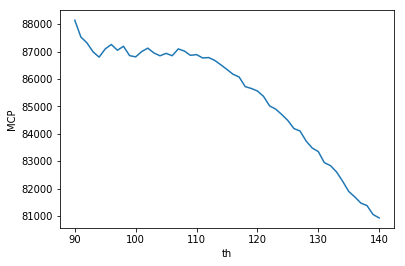

In [174]:
plt.plot(th, MCP)
plt.xlabel('th')
plt.ylabel('MCP')
plt.show()

In [175]:
[th, TEY, MCP, pm3] = spec_data_bg_subtracted_scans("./data/", "E6_Bare", [151, 152], [153, 154])

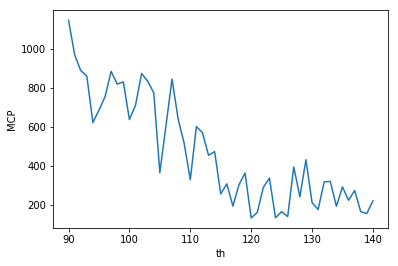

In [176]:
plt.plot(th, MCP)
plt.xlabel('th')
plt.ylabel('MCP')
plt.show()

In [177]:
signal_data = spec_data_average("./data/", "E6_Bare", [151, 152])
bg_data = spec_data_average("./data/", "E6_Bare", [153, 154])
[th, TEY, MCP, pm3] = spec_data_bg_subtracted(signal_data, bg_data)

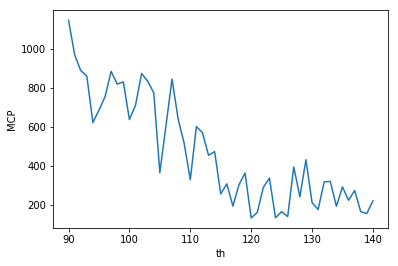

In [178]:
plt.plot(th, MCP)
plt.xlabel('th')
plt.ylabel('MCP')
plt.show()

In [188]:
db1 = spec_scan_reader("./data/", "E6_Bare", 151)
db2 = spec_scan_reader("./data/", "E6_Bare", 152)

In [197]:
db = [db1, db2]

In [198]:
db

[[array([  90.000004,   91.000004,   92.000004,   93.000004,   94.000004,
           95.000005,   96.000005,   97.000005,   98.000005,   99.000005,
          100.      ,  101.      ,  102.      ,  103.      ,  104.      ,
          105.      ,  106.00001 ,  107.00001 ,  108.00001 ,  109.00001 ,
          110.00001 ,  111.00001 ,  112.00001 ,  113.00001 ,  114.00001 ,
          115.00001 ,  116.00001 ,  117.00001 ,  118.00001 ,  119.00001 ,
          120.00001 ,  121.00001 ,  122.00001 ,  123.00001 ,  124.00001 ,
          125.00001 ,  126.00001 ,  127.00001 ,  128.00001 ,  129.00001 ,
          130.00001 ,  130.99951 ,  132.00001 ,  133.00001 ,  134.00001 ,
          135.00001 ,  136.00001 ,  137.00001 ,  138.00001 ,  139.00001 ,
          140.00001 ]),
  array([ 14235.375,  14221.   ,  14219.5  ,  14208.75 ,  14222.625,
          14231.5  ,  14245.375,  14272.125,  14299.5  ,  14328.375,
          14359.   ,  14404.25 ,  14445.125,  14514.625,  14556.875,
          14613.625,  14673.6

In [196]:
datablock = spec_data_reader("./data/", "E6_Bare", [151, 152])
datablock

[[array([  90.000004,   91.000004,   92.000004,   93.000004,   94.000004,
           95.000005,   96.000005,   97.000005,   98.000005,   99.000005,
          100.      ,  101.      ,  102.      ,  103.      ,  104.      ,
          105.      ,  106.00001 ,  107.00001 ,  108.00001 ,  109.00001 ,
          110.00001 ,  111.00001 ,  112.00001 ,  113.00001 ,  114.00001 ,
          115.00001 ,  116.00001 ,  117.00001 ,  118.00001 ,  119.00001 ,
          120.00001 ,  121.00001 ,  122.00001 ,  123.00001 ,  124.00001 ,
          125.00001 ,  126.00001 ,  127.00001 ,  128.00001 ,  129.00001 ,
          130.00001 ,  130.99951 ,  132.00001 ,  133.00001 ,  134.00001 ,
          135.00001 ,  136.00001 ,  137.00001 ,  138.00001 ,  139.00001 ,
          140.00001 ]),
  array([ 14235.375,  14221.   ,  14219.5  ,  14208.75 ,  14222.625,
          14231.5  ,  14245.375,  14272.125,  14299.5  ,  14328.375,
          14359.   ,  14404.25 ,  14445.125,  14514.625,  14556.875,
          14613.625,  14673.6

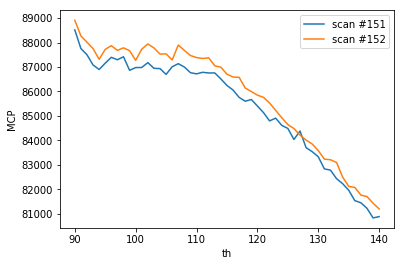

In [199]:
spec_plot(db, "MCP", [151, 152], "scan #", "")

In [202]:
6.62*10**-34 / (2000*1.6*10**-19)

2.06875e-18

In [204]:
2*3.14159/(3.597*10**-10)

17467834306.366417

In [244]:
import math
h = 6.62*10**-34
c = 3*10**8
hbar = h/2/3.14159

a_star = 2*3.14159/3.597 * 1.743

k = a_star*10**10

E = k * hbar * c

E / (2*1.6*10**-19)

3007.3655129274393

In [213]:
Edata = spec_scan_reader("./data/PKU/Cu_1_data/", "Cu_1", 4)

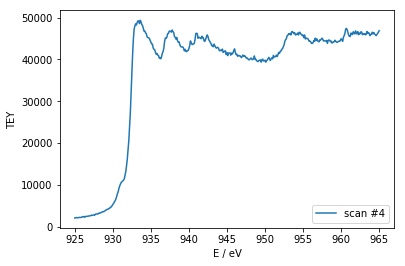

In [238]:
spec_plot([Edata], "E / eV", "TEY", [4], "scan #", "")